In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=26b9035b94cba0174864cbc68edc63065a1dc045fa74a7eaeba0d85743eae175
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [ ]:
import cv2
import numpy as np
import face_recognition_models
import face_recognition
import matplotlib.pyplot as plt


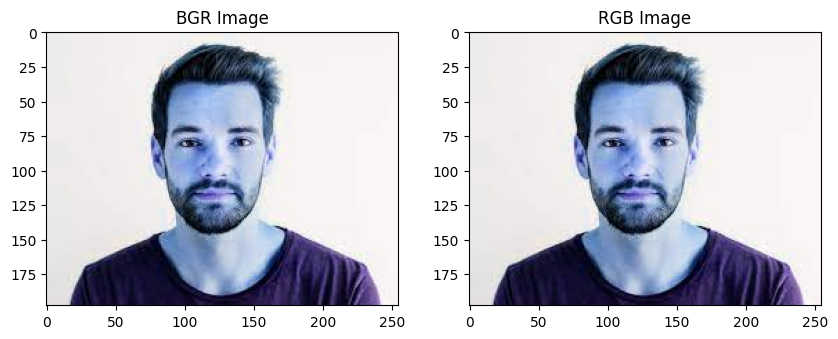

In [ ]:
import cv2
import face_recognition
from matplotlib import pyplot as plt

# Load and convert image
imgelon_bgr = face_recognition.load_image_file('2/1.jpg')
imgelon_rgb = cv2.cvtColor(imgelon_bgr, cv2.COLOR_BGR2RGB)

# Display images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('BGR Image')
plt.imshow(cv2.cvtColor(imgelon_bgr, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display

plt.subplot(1, 2, 2)
plt.title('RGB Image')
plt.imshow(imgelon_rgb)

plt.show()


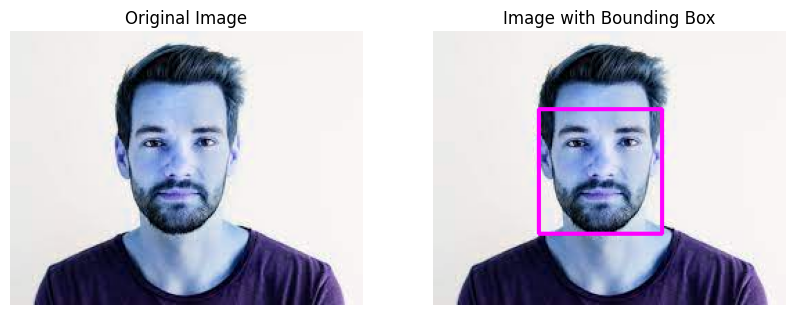

In [ ]:
import cv2
import face_recognition
import matplotlib.pyplot as plt

# Load image
imgelon = face_recognition.load_image_file('2/1.jpg')
imgelon_rgb = cv2.cvtColor(imgelon, cv2.COLOR_BGR2RGB)

# Finding face locations for drawing bounding boxes
face = face_recognition.face_locations(imgelon_rgb)[0]

# Copy the image for drawing
copy = imgelon_rgb.copy()

# Drawing the rectangle
cv2.rectangle(copy, (face[3], face[0]), (face[1], face[2]), (255, 0, 255), 2)

# Displaying images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(imgelon_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Image with Bounding Box')
plt.imshow(copy)
plt.axis('off')

plt.show()


In [ ]:
train_elon_encodings = face_recognition.face_encodings(imgelon)[0]


In [ ]:
import cv2
import face_recognition

# Load and encode the training image
train_image = face_recognition.load_image_file('2/1.jpg')
train_image_rgb = cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB)
train_encodings = face_recognition.face_encodings(train_image_rgb)

# Ensure that at least one face is found in the training image
if len(train_encodings) > 0:
    train_encode = train_encodings[0]
else:
    raise ValueError("No faces found in the training image.")

# Load and encode the test image
test_image = face_recognition.load_image_file('2/11.jpg')
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_encodings = face_recognition.face_encodings(test_image_rgb)

# Ensure that at least one face is found in the test image
if len(test_encodings) > 0:
    test_encode = test_encodings[0]
else:
    raise ValueError("No faces found in the test image.")

# Compare the face encodings
result = face_recognition.compare_faces([train_encode], test_encode)
print(result)


[True]


In [ ]:
import cv2
import face_recognition
import os
import numpy as np
from datetime import datetime
import pickle

In [ ]:
path = '2'


In [ ]:
images = []
classNames = []
mylist = os.listdir(path)
for cl in mylist:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])

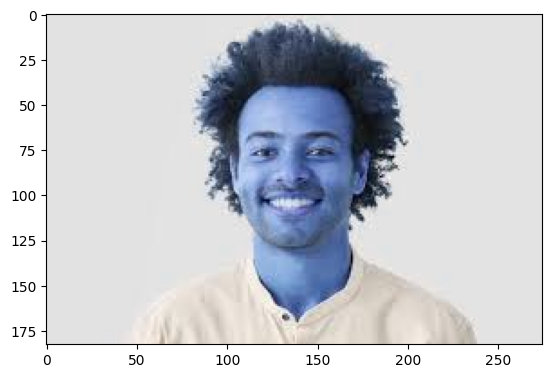

In [ ]:
plt.imshow(curImg)

In [ ]:
mylist

['22.jpg', '11.jpg', '41.jpg', '2.jpg', '1.jpg', '3.jpg']

**Developing Student Auto Attendance Application**

In [ ]:
import cv2
import face_recognition
import os
import numpy as np
from datetime import datetime
import pickle

In [ ]:
path = '2'

In [ ]:
images = []
classNames = []
mylist = os.listdir(path)
for cl in mylist:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])


In [ ]:
mylist

['22.jpg', '11.jpg', '41.jpg', '2.jpg', '1.jpg', '3.jpg']

In [ ]:
print(classNames)

['22', '11', '41', '2', '1', '3']


In [ ]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime

def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encodings = face_recognition.face_encodings(img)
        if encodings:  # Check if any faces were found
            encoded_face = encodings[0]
            encodeList.append(encoded_face)
    return encodeList

def markAttendance(name, img_path):
    with open('1/Attendance.csv', 'r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        if name not in nameList:
            now = datetime.now()
            dtString = now.strftime('%H:%M:%S')
            f.writelines(f'\n{name},{dtString},{img_path}')

# Path to your images
path = '2'

# Initialize lists to hold images and class names
images = []
classNames = []

# Load images and class names
mylist = os.listdir(path)
for cl in mylist:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])

# Encode faces in the loaded images
encoded_face_train = findEncodings(images)

# Capture video from webcam
cap = cv2.VideoCapture(0)

while True:
    success, img = cap.read()
    if not success:
        break
    imgS = cv2.resize(img, (0, 0), None, 0.25, 0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)

    faces_in_frame = face_recognition.face_locations(imgS)
    encoded_faces = face_recognition.face_encodings(imgS, faces_in_frame)

    for encode_face, faceloc in zip(encoded_faces, faces_in_frame):
        matches = face_recognition.compare_faces(encoded_face_train, encode_face)
        faceDist = face_recognition.face_distance(encoded_face_train, encode_face)
        matchIndex = np.argmin(faceDist)

        name = "Unknown"
        if matches[matchIndex]:
            name = classNames[matchIndex].upper()

        y1, x2, y2, x1 = faceloc
        # since we scaled down by 4 times
        y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.rectangle(img, (x1, y2 - 35), (x2, y2), (0, 255, 0), cv2.FILLED)
        cv2.putText(img, name, (x1 + 6, y2 - 5), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)

        # Save the recognized or unrecognized face image
        now = datetime.now()
        img_name = f"1/2/{name}_{now.strftime('%Y%m%d_%H%M%S')}.jpg"
        cv2.imwrite(img_name, img)

        markAttendance(name, img_name)

    cv2.imshow('Webcam', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime
from IPython.display import display, Image

def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encodings = face_recognition.face_encodings(img)
        if encodings:  # Check if any faces were found
            encoded_face = encodings[0]
            encodeList.append(encoded_face)
    return encodeList

def markAttendance(name, img_path):
    with open('1/Attendance.csv', 'r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        if name not in nameList:
            now = datetime.now()
            dtString = now.strftime('%H:%M:%S')
            f.writelines(f'\n{name},{dtString},{img_path}')

# Path to your images
path = '2'

# Initialize lists to hold images and class names
images = []
classNames = []

# Load images and class names
mylist = os.listdir(path)
for cl in mylist:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])

# Encode faces in the loaded images
encoded_face_train = findEncodings(images)

# Capture video from webcam
cap = cv2.VideoCapture(0)

while True:
    success, img = cap.read()
    if not success:
        break
    imgS = cv2.resize(img, (0, 0), None, 0.25, 0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)

    faces_in_frame = face_recognition.face_locations(imgS)
    encoded_faces = face_recognition.face_encodings(imgS, faces_in_frame)

    for encode_face, faceloc in zip(encoded_faces, faces_in_frame):
        matches = face_recognition.compare_faces(encoded_face_train, encode_face)
        faceDist = face_recognition.face_distance(encoded_face_train, encode_face)
        matchIndex = np.argmin(faceDist)

        name = "Unknown"
        if matches[matchIndex]:
            name = classNames[matchIndex].upper()

        y1, x2, y2, x1 = faceloc
        # since we scaled down by 4 times
        y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.rectangle(img, (x1, y2 - 35), (x2, y2), (0, 255, 0), cv2.FILLED)
        cv2.putText(img, name, (x1 + 6, y2 - 5), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)

        # Save the recognized or unrecognized face image
        now = datetime.now()
        img_name = f"1/2/{name}_{now.strftime('%Y%m%d_%H%M%S')}.jpg"
        cv2.imwrite(img_name, img)

        markAttendance(name, img_name)

    # Display the webcam feed
    ret, jpeg = cv2.imencode('.jpg', img)
    display(Image(data=jpeg.tobytes()))

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import face_recognition
import numpy as np
from datetime import datetime
import os

# Pre-trained encodings and class names
encoded_face_train = []  # Populate this list with pre-trained encodings
classNames = []  # Populate this list with corresponding class names

#def findEncodings(images):
 #   encodeList = []
  #  for img in images:
   #     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #    face_locations = face_recognition.face_locations(img)
     #   if len(face_locations) > 0:
      #      encoded_face = face_recognition.face_encodings(img)[0]
       #     encodeList.append(encoded_face)
        #else:
         #   print("No face detected in the image.")
    #return encodeList

def findEncodings(images):
    encodeList = []
    for img in images:
        try:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            encoded_face = face_recognition.face_encodings(img)[0]
            encodeList.append(encoded_face)
            print("Face encoded successfully")
        except Exception as e:
            print("Error encoding face:", e)
    return encodeList

# Load pre-trained encodings and class names
path = '/content/2'
images = []
mylist = os.listdir(path)
for cl in mylist:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])

encoded_face_train = findEncodings(images)

def markAttendance(name):
    with open('/content/Attendance.csv', 'r+') as f:
        # Check if the student is already marked present
        attendance_list = f.readlines()
        students_present = [line.strip().split(',')[0] for line in attendance_list]

        # Write to the CSV file only if the student is not already marked present
        if name not in students_present:
            now = datetime.now()
            dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
            print("Writing to CSV:", name, dt_string)
            f.write(f'\n{name},{dt_string}')
        else:
            print("Student already marked present:", name)




# Capture video from webcam
cap = cv2.VideoCapture(0)

while True:
    success, img = cap.read()
    if not success:
        break
    imgS = cv2.resize(img, (0, 0), None, 0.25, 0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)

    faces_in_frame = face_recognition.face_locations(imgS)
    encoded_faces = face_recognition.face_encodings(imgS, faces_in_frame)

    for encode_face, faceloc in zip(encoded_faces, faces_in_frame):
        matches = face_recognition.compare_faces(encoded_face_train, encode_face)
        faceDist = face_recognition.face_distance(encoded_face_train, encode_face)
        matchIndex = np.argmin(faceDist)

        name = "Unknown"
        if matches[matchIndex]:
            name = classNames[matchIndex].upper()

        y1, x2, y2, x1 = faceloc
        # since we scaled down by 4 times
        y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.rectangle(img, (x1, y2 - 35), (x2, y2), (0, 255, 0), cv2.FILLED)
        cv2.putText(img, name, (x1 + 6, y2 - 5), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)

        # Save the recognized or unrecognized face image
        now = datetime.now()
        img_name = f"1/2/{name}_{now.strftime('%Y%m%d_%H%M%S')}.jpg"
        cv2.imwrite(img_name, img)

        markAttendance(name, img_name)

    # Display the webcam feed
    ret, jpeg = cv2.imencode('.jpg', img)
    display(Image(data=jpeg.tobytes()))

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Error encoding face: list index out of range
Face encoded successfully
Face encoded successfully
Face encoded successfully
Error encoding face: list index out of range
Face encoded successfully
Face encoded successfully
